<a href="https://colab.research.google.com/github/mananjain0220/ML-and-Computer-Vision/blob/main/Object_classification_using_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/testing_and_saved_model

/content/gdrive/MyDrive/testing_and_saved_model


In [ ]:
!ls

assets	fingerprint.pb	keras_metadata.pb  my_model  saved_model.pb  testing_images  variables


In [ ]:
%cd /content/gdrive/MyDrive/testing_and_saved_model/testing_images/

/content/gdrive/MyDrive/testing_and_saved_model/testing_images


In [ ]:

batch_size = 32
img_height = 180
img_width = 180

data_dir = "/content/gdrive/MyDrive/image_dataset"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # specify the fraction of data to be reserved for validation
  subset="training",
  seed=123,  # set seed for reproducibility
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 611 files belonging to 2 classes.
Using 489 files for training.
Found 611 files belonging to 2 classes.
Using 122 files for validation.


In [ ]:
class_names = train_ds.class_names
print("Class names: ", class_names)


Class names:  ['negative_examples', 'positive_examples']


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



In [ ]:

# Data Augmentation
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])



In [ ]:

# Use a pre-trained model (VGG16) as the base model
base_model = tf.keras.applications.VGG19(input_shape=(180, 180, 3),
                                          include_top=False,
                                          weights='imagenet')
base_model.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Build the Model
num_classes = 2

model = models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

# Train the Model
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
16/16 [==============================] - 2s 63ms/step - loss: 0.2845 - accuracy: 0.8978 - val_loss: 0.1756 - val_accuracy: 0.9590
Epoch 2/10
16/16 [==============================] - 1s 48ms/step - loss: 0.2752 - accuracy: 0.8937 - val_loss: 0.1655 - val_accuracy: 0.9508
Epoch 3/10
16/16 [==============================] - 1s 46ms/step - loss: 0.2665 - accuracy: 0.8957 - val_loss: 0.1545 - val_accuracy: 0.9672
Epoch 4/10
16/16 [==============================] - 1s 48ms/step - loss: 0.2530 - accuracy: 0.9121 - val_loss: 0.1473 - val_accuracy: 0.9672
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 0.2502 - accuracy: 0.8937 - val_loss: 0.1397 - val_accuracy: 0.9672
Epoch 6/10
16/16 [==============================] - 1s 47ms/step - loss: 0.2501 - accuracy: 0.9223 - val_loss: 0.1364 - val_accuracy: 0.9672
Epoch 7/10
16/16 [==============================] - 1s 49ms/step - loss: 0.2471 - accuracy: 0.9162 - val_loss: 0.1296 - val_accuracy: 0.9672
Epoch 8/10
16

4/4 [==============================] - 0s 39ms/step - loss: 0.1191 - accuracy: 0.9672
Validation accuracy: 96.72%


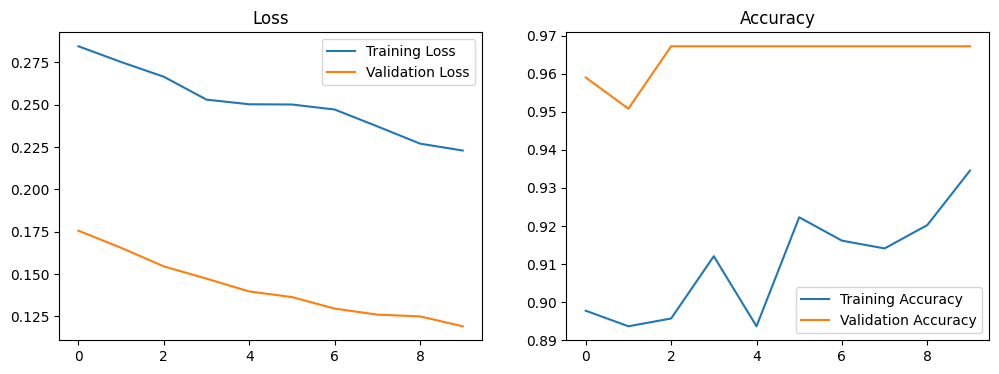

In [ ]:


# Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()



In [ ]:
#Optional: Save the Model
model.save('/content/gdrive/MyDrive/testing_and_saved_model')


In [ ]:
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/testing_and_saved_model')


In [ ]:


# Load the trained model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/testing_and_saved_model')

# Directory containing the unlabelled images
image_directory = '/content/gdrive/MyDrive/testing_and_saved_model/testing_images/'


batch_size = 32
img_height = 180
img_width = 180


# Preprocess the images
def preprocess_image(image_path, img_height, img_width):
    img = Image.open(image_path).convert('RGB')  # Convert image to RGB
    img = img.resize((img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    img_array /= 255.0  # Normalize to [0, 1] range
    return img_array


# Predict and display the results
for image_name in os.listdir(image_directory):
    image_path = os.path.join(image_directory, image_name)
    img_array = preprocess_image(image_path, img_height, img_width)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Assuming your model outputs class scores
    confidence = np.max(predictions)
    print(f"Image: {image_name}, Predicted Class: {predicted_class},%%%%%%%% Confidence: {confidence}")


1/1 [==============================] - 0s 145ms/step
Image: image1.jpeg, Predicted Class: 0,%%%%%%%% Confidence: 0.932096540927887
1/1 [==============================] - 0s 21ms/step
Image: image2.jpg, Predicted Class: 0,%%%%%%%% Confidence: 0.9320042729377747
1/1 [==============================] - 0s 20ms/step
Image: image3.jpeg, Predicted Class: 0,%%%%%%%% Confidence: 0.9326393604278564
1/1 [==============================] - 0s 21ms/step
Image: image4.jpeg, Predicted Class: 0,%%%%%%%% Confidence: 0.9322328567504883
1/1 [==============================] - 0s 21ms/step
Image: image5.jpeg, Predicted Class: 0,%%%%%%%% Confidence: 0.9319966435432434
1/1 [==============================] - 0s 21ms/step
Image: image7.jpeg, Predicted Class: 0,%%%%%%%% Confidence: 0.9321467876434326
1/1 [==============================] - 0s 21ms/step
Image: image8.jpeg, Predicted Class: 0,%%%%%%%% Confidence: 0.9323908090591431
1/1 [==============================] - 0s 21ms/step
Image: image9.jpeg, Predicted Cl

UnidentifiedImageError: ignored